In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib.inline

UsageError: Line magic function `%` not found.


In [4]:
car=pd.read_excel(r"data_set\car_crash.xlsx")

In [5]:
car

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [6]:
car.shape

(53943, 11)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [8]:
car.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

In [10]:
car.columns

Index(['Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude'],
      dtype='object')

In [13]:
car.duplicated().sum()

64

In [18]:
car.drop_duplicates(inplace=True)

In [19]:
car.shape

(53879, 11)

In [20]:
car.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [21]:
car1=car.copy()

In [26]:
car["Weekend?"].fillna(car["Weekend?"].mode()[0],inplace=True)

In [28]:
car['Hour'].fillna(car['Hour'].mean(),inplace=True)

In [30]:
car.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?                0
Hour                    0
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [31]:
car["Primary Factor"].fillna(car["Primary Factor"].mode()[0],inplace=True)

In [35]:
car.dropna(inplace=True)

In [36]:
car.isna().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

In [38]:
car.shape

(53808, 11)

- after filling and dropingt Na values the current shape of the dataset is 538008

In [40]:
car.head(5)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [58]:
car.describe(include='all')

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
count,53808.000000,53808.000000,53808.000000,53808,53808.000000,53808,53808,53808,53808,53808.000000,53808.000000
unique,NaN,NaN,NaN,2,NaN,7,4,55,19355,NaN,NaN
top,NaN,NaN,NaN,Weekday,NaN,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,E 3RD ST,NaN,NaN
freq,NaN,NaN,NaN,40569,NaN,37508,41485,12286,374,NaN,NaN
mean,2008.966566,6.660887,4.197201,NaN,1347.459763,NaN,NaN,NaN,NaN,35.602035,-78.663280
std,3.787507,3.514729,1.909393,NaN,530.439248,NaN,NaN,NaN,NaN,11.261566,24.895083
min,2003.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,NaN,1000.000000,NaN,NaN,NaN,NaN,39.142048,-86.551533
50%,2009.000000,7.000000,4.000000,NaN,1400.000000,NaN,NaN,NaN,NaN,39.164436,-86.530992
75%,2012.000000,10.000000,6.000000,NaN,1700.000000,NaN,NaN,NaN,NaN,39.173344,-86.508288


from the above table its almost clear that the chances for outliers are less
more number of accidents must have occured in the year 2008
more number of accidents occured month will be june
weekdays are having most number of crashes
collision type is having more numbers with a crash of two cars
primary factor is the failure to yield the right way

In [49]:
car[['Latitude','Longitude']].corr()

,Latitude,Longitude
Latitude,1.000000,-0.999404
Longitude,-0.999404,1.000000


<Axes: >

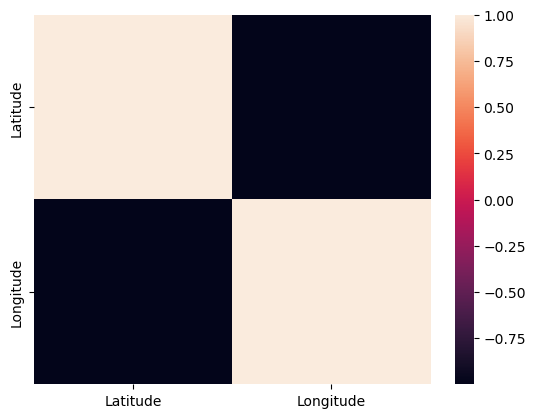

In [50]:
sns.heatmap(car[['Latitude','Longitude']].corr())

- latitude and longitude have high negative correlation

In [51]:
car['Weekend?'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [52]:
car['Weekend?'].value_counts()

Weekend?
Weekday    40569
Weekend    13239
Name: count, dtype: int64

<Axes: xlabel='Weekend?', ylabel='count'>

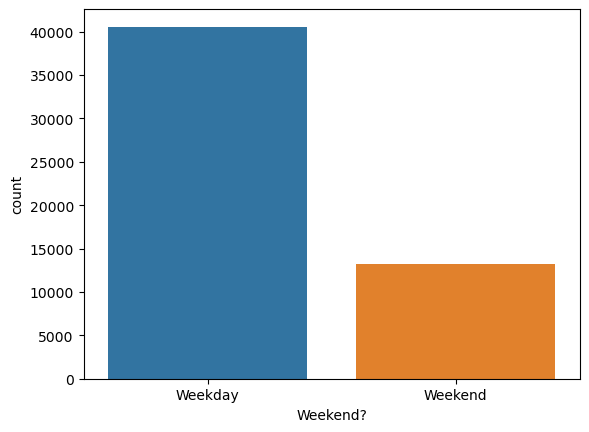

In [57]:
sns.countplot(data=car,x="Weekend?")

- weekday have more car carsh than weekend

In [62]:
car['Month'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  6,  9, 10, 11, 12], dtype=int64)

In [63]:
car['Month'].value_counts()

Month
10    5571
9     4986
11    4873
1     4653
12    4578
4     4567
2     4532
8     4475
5     4203
3     3840
7     3786
6     3744
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

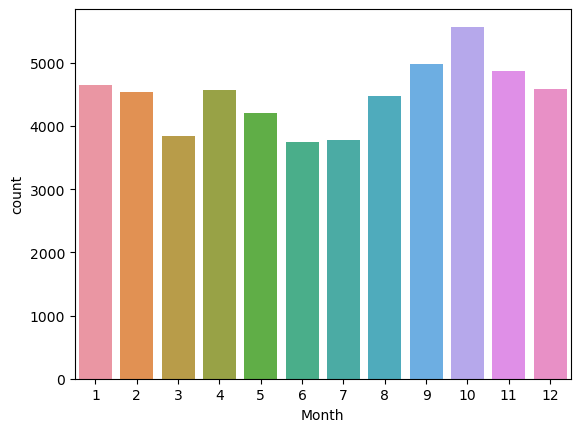

In [64]:
sns.countplot(data=car,x='Month')

- october month have the most car crash in the year
- second most is the september and third is november 
- october saw the most number of accidents followed by september then november
-ther reasons may be Transition from summer to fall,Reduced daylight hours,Wet leaves and rain resulting in skidding
 Holidays: October often sees holidays like Halloween and Thanksgiving, leading to more people traveling by car, which naturally   increases the risk of accidents.

In [65]:
car['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003], dtype=int64)

In [66]:
car['Year'].value_counts()

Year
2003    4606
2008    4330
2015    4278
2004    4257
2012    4219
2014    4156
2010    4055
2013    4054
2007    4049
2009    4007
2005    3960
2006    3932
2011    3905
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

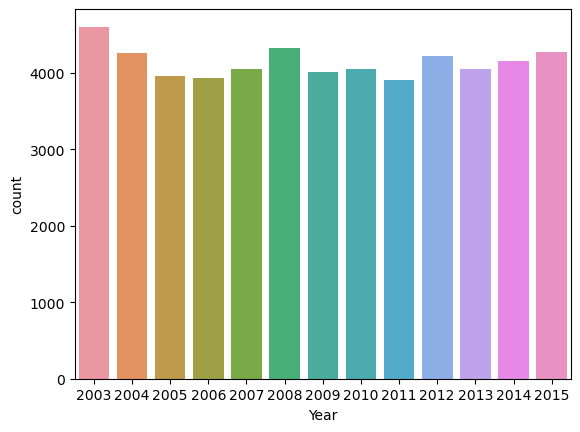

In [67]:
sns.countplot(data=car,x='Year')

- 2003 have the highest number  car crash 
- 2008 have the second highest number car crash

In [68]:
car['Collision Type'].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle'], dtype=object)

In [69]:
car['Collision Type'].value_counts()

Collision Type
2-Car               37508
1-Car               10219
3+ Cars              3150
Moped/Motorcycle     1007
Bus                   848
Pedestrian            608
Cyclist               468
Name: count, dtype: int64

<Axes: xlabel='Collision Type', ylabel='count'>

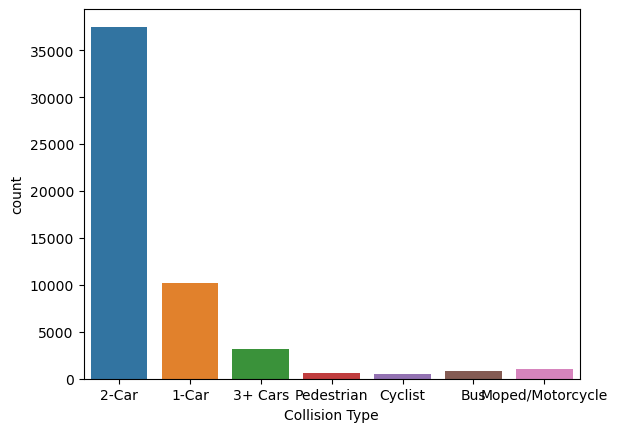

In [70]:
sns.countplot(data=car,x='Collision Type')

- 2 car accidents are the most 
- and the secodn most are 1 car accidents

In [71]:
car.head(5)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


<Axes: ylabel='count'>

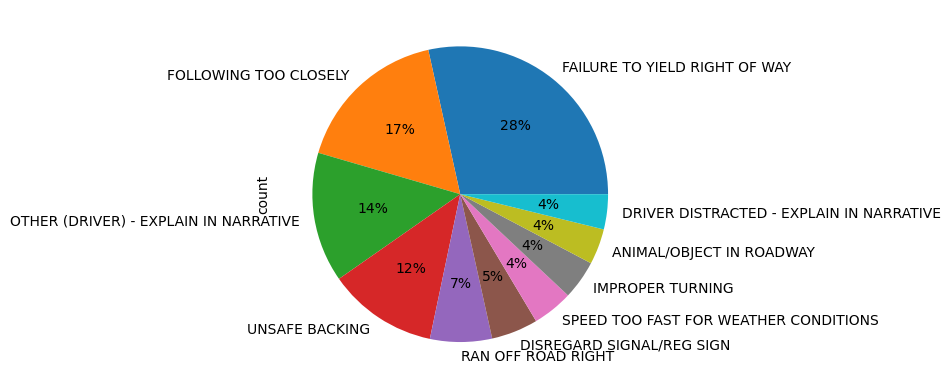

In [73]:
car["Primary Factor"].value_counts().head(10).plot(kind="pie",autopct='%1.0f%%')

- 28% of crashes are due to the failure to yield right of way
- 17% is because of not keeping fair distance between vehicles which may end in rear end collisions or chain reactions
- 14% is because of other driver
- 12% because of unsafe backing

In [74]:
car.head(5)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


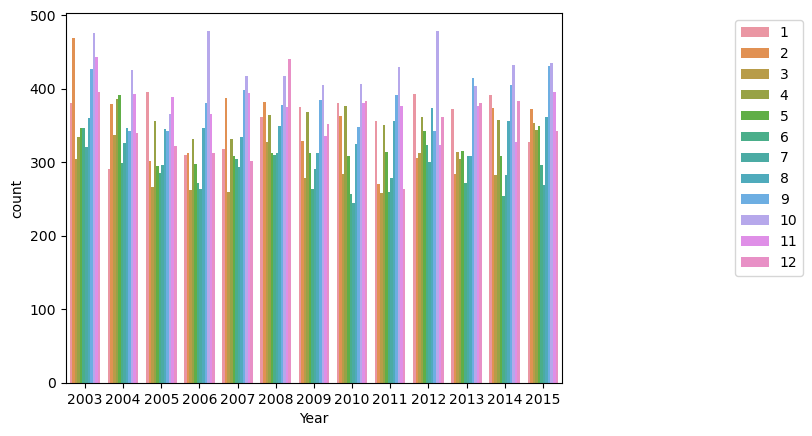

In [76]:
sns.countplot(data=car,x="Year",hue="Month")
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

In [7]:
car['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

In [8]:
car['Injury Type'].value_counts()

Injury Type
No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: count, dtype: int64

<Axes: ylabel='count'>

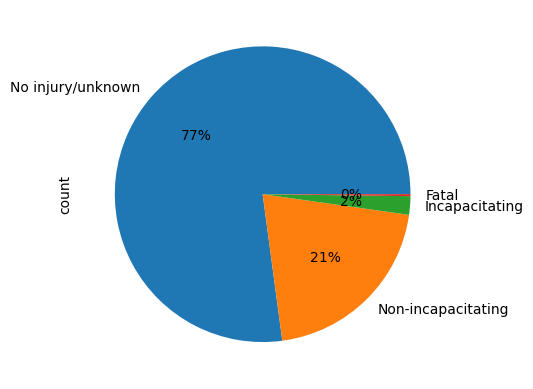

In [10]:
car['Injury Type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

- 77% of car crashes are with no injury
- 20.7% non incapacitating which means small injuries that doesnot affect their daily activities
- 2% incapacitating which means their will be big injuries that limit your ability to complete with daily activities
- only 0.2% is fatal

In [13]:
car['Reported_Location'].unique()

array(['1ST & FESS', '2ND & COLLEGE', 'BASSWOOD & BLOOMFIELD', ...,
       'RAPPLE & SR45', 'NINETH & NORTH', 'MONROW & THIRD ST'],
      dtype=object)

In [16]:
car['Reported_Location'].value_counts()

Reported_Location
E 3RD ST                         375
W 3RD ST                         222
SR37N & VERNAL                   197
3RD ST                           195
S WALNUT ST                      172
                                ... 
GARRISON CHAPEL RD & TRENDMAR      1
GOODNIGHT & S CLARIZZ BLVD         1
ADAIR & PLEASANT RIDGE RD          1
BRIGHTON CRST & SMITH              1
MONROW & THIRD ST                  1
Name: count, Length: 19364, dtype: int64

<Axes: xlabel='Reported_Location'>

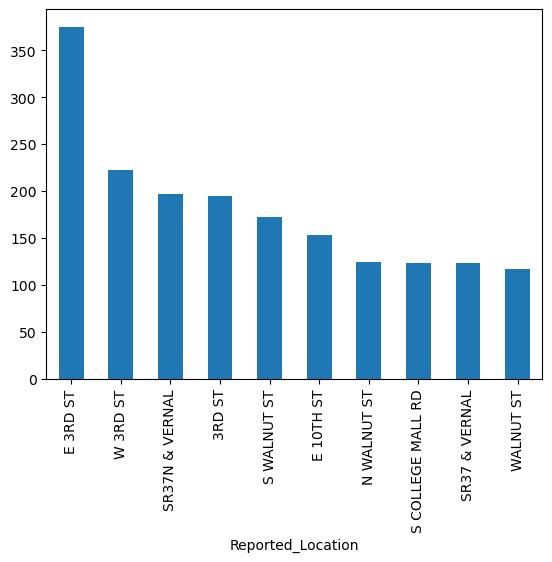

In [15]:
car['Reported_Location'].value_counts().head(10).plot(kind='bar')

- E 3RD ST have the heighest car crash 
- W 3RD ST have the second heighest car crash

<Axes: xlabel='Primary Factor'>

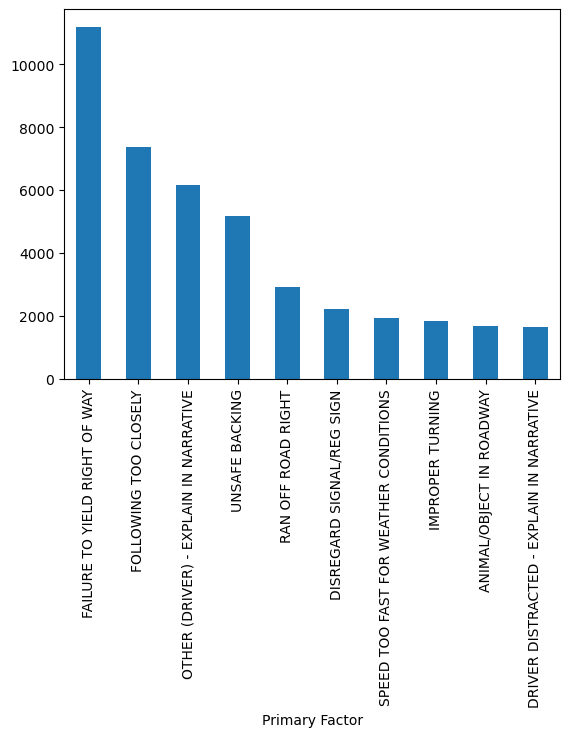

In [18]:
car["Primary Factor"].value_counts().head(10).plot(kind="bar")

In [20]:
car['Primary Factor'].value_counts().head(10)

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1688
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
Name: count, dtype: int64

In [21]:
car2=car[car['Injury Type']=='Fatal']

In [23]:
car2

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
530,2015,4,6,Weekday,1600.0,1-Car,Fatal,RAN OFF ROAD RIGHT,DUNCAN & W LEONARD SPRINGS,39.122352,-86.596400
531,2015,4,7,Weekend,1500.0,2-Car,Fatal,RAN OFF ROAD RIGHT,KIRBY & W ST RD 48,39.059185,-86.610820
649,2015,1,4,Weekday,1700.0,2-Car,Fatal,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,SR 45,39.125312,-86.610496
1334,2015,4,1,Weekend,700.0,1-Car,Fatal,RAN OFF ROAD RIGHT,INGRAM & SR37N,39.002892,-86.537282
1873,2015,6,3,Weekday,2200.0,Moped/Motorcycle,Fatal,RAN OFF ROAD RIGHT,SR37S & STATE ROAD 45,39.252134,-86.575043
...,...,...,...,...,...,...,...,...,...,...,...
53043,2003,6,5,Weekday,700.0,2-Car,Fatal,LEFT OF CENTER,FULLERTON PIKE & SR 37,39.122332,-86.569889
53289,2003,4,7,Weekend,0.0,Moped/Motorcycle,Fatal,ALCOHOLIC BEVERAGES,CLEVE BUTCHER & FAIRFAX,39.060039,-86.498433
53665,2003,10,6,Weekday,400.0,1-Car,Fatal,RAN OFF ROAD LEFT,CEDAR BLUFF & SR37,0.000000,0.000000
53681,2003,5,4,Weekday,1700.0,2-Car,Fatal,LEFT OF CENTER,BURGOON CHAPEL & SR446,0.000000,0.000000


In [25]:
car2['Primary Factor'].value_counts()

Primary Factor
RAN OFF ROAD RIGHT                          29
LEFT OF CENTER                              22
UNSAFE SPEED                                15
FAILURE TO YIELD RIGHT OF WAY                8
PEDESTRIAN ACTION                            7
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        7
ALCOHOLIC BEVERAGES                          6
DISREGARD SIGNAL/REG SIGN                    4
RAN OFF ROAD LEFT                            3
OVERCORRECTING/OVERSTEERING                  3
OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR      1
DRIVER ASLEEP OR FATIGUED                    1
ROADWAY SURFACE CONDITION                    1
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1
IMPROPER LANE USAGE                          1
IMPROPER PASSING                             1
ACCELERATOR FAILURE OR DEFECTIVE             1
ANIMAL/OBJECT IN ROADWAY                     1
FOLLOWING TOO CLOSELY                        1
OBSTRUCTION NOT MARKED                       1
SPEED TOO FAST FOR WEATHER CONDITIONS        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'RAN OFF ROAD RIGHT'),
  Text(1, 0, 'OTHER (DRIVER) - EXPLAIN IN NARRATIVE'),
  Text(2, 0, 'UNSAFE SPEED'),
  Text(3, 0, 'DISREGARD SIGNAL/REG SIGN'),
  Text(4, 0, 'LEFT OF CENTER'),
  Text(5, 0, 'OBSTRUCTION NOT MARKED'),
  Text(6, 0, 'PEDESTRIAN ACTION'),
  Text(7, 0, 'FAILURE TO YIELD RIGHT OF WAY'),
  Text(8, 0, 'FOLLOWING TOO CLOSELY'),
  Text(9, 0, 'OVERCORRECTING/OVERSTEERING'),
  Text(10, 0, 'IMPROPER LANE USAGE'),
  Text(11, 0, 'ANIMAL/OBJECT IN ROADWAY'),
  Text(12, 0, 'ACCELERATOR FAILURE OR DEFECTIVE'),
  Text(13, 0, 'IMPROPER PASSING'),
  Text(14, 0, 'ALCOHOLIC BEVERAGES'),
  Text(15, 0, 'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE'),
  Text(16, 0, 'ROADWAY SURFACE CONDITION'),
  Text(17, 0, 'DRIVER ASLEEP OR FATIGUED'),
  Text(18, 0, 'RAN OFF ROAD LEFT'),
  Text(19, 0, 'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR'),
  Text(20, 0, 'SPEED TOO FAST FOR WEATHER CONDITIO

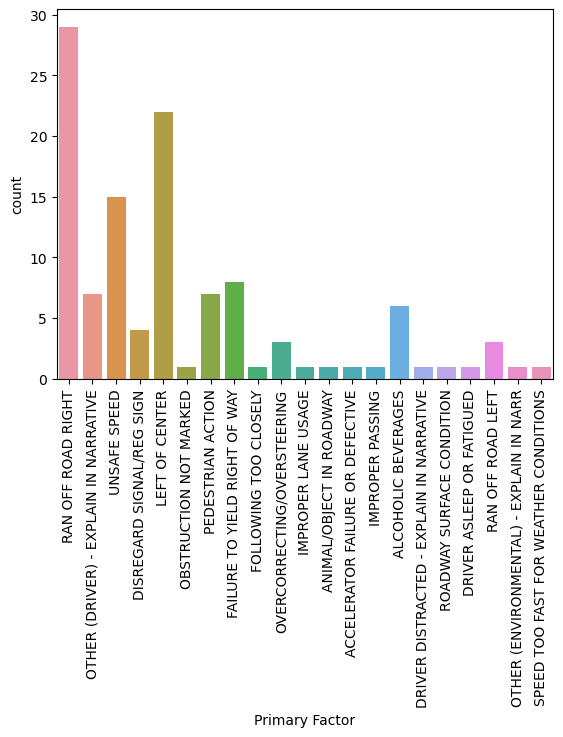

In [27]:
sns.countplot(data=car2,x='Primary Factor')
plt.xticks(rotation=90)

- the three main reason for car crash that lead to fatal injuries are 
- RAN OFF ROAD RIGHT 
- LEFT OF CENTER 
- UNSAFE SPEED    

In [37]:
car2['Collision Type'].value_counts()

Collision Type
1-Car               49
2-Car               31
Moped/Motorcycle    21
Pedestrian           8
3+ Cars              5
Bus                  1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1-Car'),
  Text(1, 0, '2-Car'),
  Text(2, 0, 'Moped/Motorcycle'),
  Text(3, 0, 'Pedestrian'),
  Text(4, 0, '3+ Cars'),
  Text(5, 0, 'Bus')])

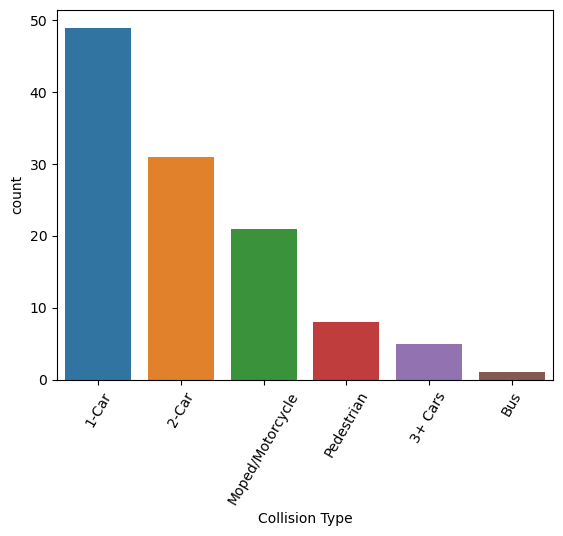

In [40]:
sns.countplot(data=car2,x='Collision Type')
plt.xticks(rotation=60)

- most of the fatal injury happened because of 1 car accident

In [28]:
car['Hour'].unique()

array([   0., 1500., 2300.,  900., 1100., 1800., 1200., 1400., 1600.,
       1700., 1300.,  700., 2100., 2000., 1900.,  400., 1000.,  600.,
        800., 2200.,  100.,  200.,  300.,  500.,   nan])

In [30]:
car['Hour'].value_counts()

Hour
1700.0    4631
1600.0    4488
1500.0    4283
1200.0    3819
1400.0    3750
1300.0    3526
1800.0    3232
1100.0    3040
1900.0    2442
1000.0    2360
900.0     2318
800.0     2247
700.0     2031
2000.0    1918
2100.0    1794
2200.0    1503
2300.0    1187
0.0       1115
600.0      806
100.0      801
300.0      719
200.0      716
500.0      514
400.0      478
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '100.0'),
  Text(2, 0, '200.0'),
  Text(3, 0, '300.0'),
  Text(4, 0, '400.0'),
  Text(5, 0, '500.0'),
  Text(6, 0, '600.0'),
  Text(7, 0, '700.0'),
  Text(8, 0, '800.0'),
  Text(9, 0, '900.0'),
  Text(10, 0, '1000.0'),
  Text(11, 0, '1100.0'),
  Text(12, 0, '1200.0'),
  Text(13, 0, '1300.0'),
  Text(14, 0, '1400.0'),
  Text(15, 0, '1500.0'),
  Text(16, 0, '1600.0'),
  Text(17, 0, '1700.0'),
  Text(18, 0, '1800.0'),
  Text(19, 0, '1900.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2100.0'),
  Text(22, 0, '2200.0'),
  Text(23, 0, '2300.0')])

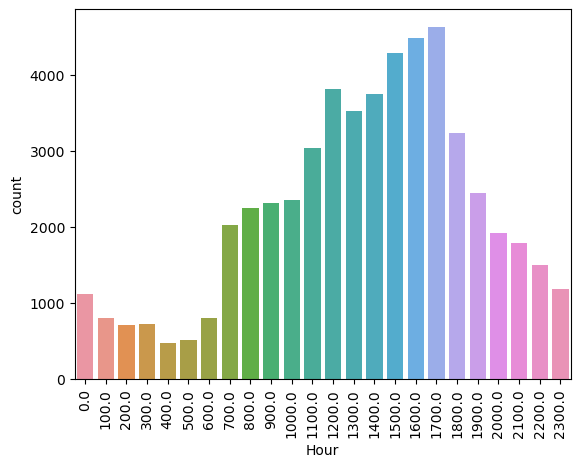

In [33]:
sns.countplot(data=car,x='Hour')
plt.xticks(rotation=90)

- the most of the accident happen at the time of 3:00 ,4:00,5:00 
- this is because of the traffic , that the time of employess are leaving their office 
- as we mention above most of the accidents are in weekdays 

In [35]:
car.head(10)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
5,2015,1,6,Weekday,1800.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BURKS & WALNUT,39.126670,-86.531370
6,2015,1,6,Weekday,1200.0,2-Car,No injury/unknown,DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,SOUTH CURRY PIKE LOT 71,39.150825,-86.584899
7,2015,1,6,Weekday,1400.0,1-Car,Incapacitating,ENGINE FAILURE OR DEFECTIVE,NORTH LOUDEN RD,39.199272,-86.637024
8,2015,1,7,Weekend,1400.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,LIBERTY & W 3RD,39.164610,-86.579130
9,2015,1,7,Weekend,1600.0,1-Car,No injury/unknown,RAN OFF ROAD RIGHT,PATTERSON & W 3RD,39.163440,-86.551280
